In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
#reading my data
data = pd.read_excel("4.AverageLink.xlsx")
print(data)


    x   y
0   9   3
1  15   6
2  15  12
3  21  12
4  24  16
5  30  20
6  35  24


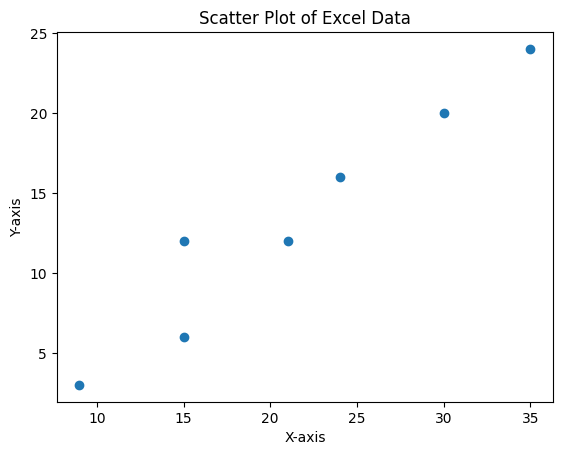

In [6]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Excel Data')
plt.show()

In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def single_linkage_clustering(data):
    
    distances = squareform(pdist(data))
    print("Initial table format after calculating distance among all pair: ")
    print(distances)
    print("Showing cluster after every iteration: ")
    
    
    num_points = len(data)
    clusters = [[i] for i in range(num_points)] 
    

    
    
    
    while len(clusters) > 1:
        min_distance = np.inf
        merge_indices = (0, 0)
        
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1 = clusters[i]
                cluster2 = clusters[j]

                min_cluster_distance = np.mean(distances[cluster1][:, cluster2])
                
                if min_cluster_distance < min_distance:
                    min_distance = min_cluster_distance
                    merge_indices = (i, j)
        
        
        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]
        
        for sublist in clusters:
            for i in range(len(sublist)):
                sublist[i] += 1
        print("Step {}: {}".format(num_points - len(clusters), clusters))
        for sublist in clusters:
            for i in range(len(sublist)):
                sublist[i] -= 1
    
    return clusters

clusters = single_linkage_clustering(data)


Initial table format after calculating distance among all pair: 
[[ 0.          6.70820393 10.81665383 15.         19.84943324 27.01851217
  33.42154993]
 [ 6.70820393  0.          6.          8.48528137 13.45362405 20.51828453
  26.90724809]
 [10.81665383  6.          0.          6.          9.8488578  17.
  23.32380758]
 [15.          8.48528137  6.          0.          5.         12.04159458
  18.43908891]
 [19.84943324 13.45362405  9.8488578   5.          0.          7.21110255
  13.60147051]
 [27.01851217 20.51828453 17.         12.04159458  7.21110255  0.
   6.40312424]
 [33.42154993 26.90724809 23.32380758 18.43908891 13.60147051  6.40312424
   0.        ]]
Showing cluster after every iteration: 
Step 1: [[1], [2], [3], [4, 5], [6], [7]]
Step 2: [[1], [2, 3], [4, 5], [6], [7]]
Step 3: [[1], [2, 3], [4, 5], [6, 7]]
Step 4: [[1, 2, 3], [4, 5], [6, 7]]
Step 5: [[1, 2, 3, 4, 5], [6, 7]]
Step 6: [[1, 2, 3, 4, 5, 6, 7]]


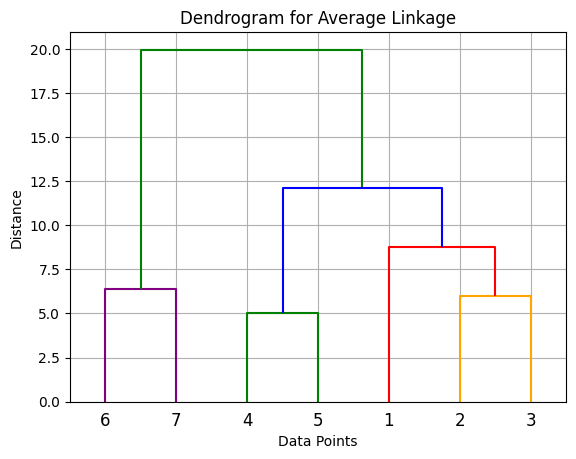

In [5]:
#dendrogram plot for Average Linkage Clustering
linkage_matrix = linkage(data, method='average', metric='euclidean')
def color_func(k):
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    return colors[k % len(colors)]
dendrogram(linkage_matrix, labels=(data.index)+1, link_color_func=lambda k: color_func(k))
plt.title('Dendrogram for Average Linkage')
plt.grid(True)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()